# Sample balanced NLST cohort

In [50]:
import pandas as pd
import os
from os import path
import numpy as np
import matplotlib.pyplot as plt

In [51]:
cohort_path = "/home/local/VANDERBILT/litz/github/MASILab/DeepLungScreening/cohorts/nlst_cohort_v1.csv"
cohort_df = pd.read_csv(cohort_path)
cohort_df

pid              id  session   age  education        bmi  phist  \
0      100004  100004time1999        0  60.0        5.0  29.414135  False   
1      100004  100004time2000        1  60.0        5.0  29.414135  False   
2      100004  100004time2001        2  60.0        5.0  29.414135  False   
3      100012  100012time1999        0  61.0        7.0  22.240116  False   
4      100012  100012time2000        1  61.0        7.0  22.240116  False   
...       ...             ...      ...   ...        ...        ...    ...   
17327  218819  218819time1999        0  66.0        4.0  19.766230  False   
17328  218819  218819time2000        1  66.0        4.0  19.766230  False   
17329  218819  218819time2001        2  66.0        4.0  19.766230  False   
17330  218866  218866time1999        0  57.0        7.0  23.055908  False   
17331  218866  218866time2000        1  57.0        7.0  23.055908  False   

       fhist  smo_status  quit_time  pkyr  lung_cancer  
0      False         0.0       15.0  34.0          0.0  
1      False         0.0       15.0  34.0          0.0  
2      False         0.0       15.0  34.0          0.0  
3      False         1.0        NaN  37.0          1.0  
4      False         1.0        NaN  37.0          1.0  
...      ...         ...        ...   ...          ...  
17327  False         1.0        NaN  52.0          0.0  
17328  False         1.0        NaN  52.0          0.0  
17329  False         1.0        NaN  52.0          0.0  
17330   True         0.0        4.0  33.3          0.0  
17331   True         0.0        4.0  33.3          0.0  

[17332 rows x 12 columns]

In [52]:
# filter for soft kernel images

df = pd.read_csv("/home/litz/data/NLST/T0_all.csv")
SOFT_KERNELS = [
        'B30f', 'STANDARD', 'B', 'FC10',         # The most optimal group
        'B20f', 'B30s', 'B31f', 'B31s', 'B35f',  # Suboptimal - SIEMENS
        'C',                                     # Suboptimal - Philips
        'FC11', 'FC02', 'FC01', 'FC30'           # Suboptimal - TOSHIBA
    ]
print(f"Num patients without kernel filters: {len(df['pid'].unique())}")

df = df[df['convolution_kernel'].isin(SOFT_KERNELS)]
print(f"Num patients with soft kernel filter: {len(df['pid'].unique())}")

def rank_kernel(x):
    rank_map={
        'B30f':0, 'STANDARD':1, 'B':2, 'FC10':3,                # The most optimal group
        'B20f':5, 'B30s':8, 'B31f':11, 'B31s':12, 'B35f':13,    # Suboptimal - SIEMENS
        'C':4,                                                  # Suboptimal - Philips
        'FC11':9, 'FC02':7, 'FC01':6, 'FC30':10                 # Suboptimal - TOSHIBA
    }
    return rank_map[x]

df['kernel_rank'] = df['convolution_kernel'].apply(lambda x: rank_kernel(x))
print(len(df))
kernel_df = df.loc[df.groupby('pid')['kernel_rank'].idxmin()]
kernel_df = kernel_df[kernel_df['nii_file']==1]
print(len(kernel_df))

Num patients without kernel filters: 24827
Num patients with soft kernel filter: 22506
28038
22090


In [53]:
cohort_sk = kernel_df.merge(cohort_df, on='pid')
cohort_sk = cohort_sk[cohort_sk['session']==0] # get T0 only
cohort_sk

pid         manufacture         model_name convolution_kernel  \
0      100004  GE MEDICAL SYSTEMS    LightSpeed Plus           STANDARD   
3      100012             SIEMENS        Volume Zoom               B30f   
5      100019             Philips             Mx8000                  C   
8      100026  GE MEDICAL SYSTEMS    LightSpeed QX/i           STANDARD   
11     100035  GE MEDICAL SYSTEMS       HiSpeed QX/i           STANDARD   
...       ...                 ...                ...                ...   
14730  218705  GE MEDICAL SYSTEMS   LightSpeed Power           STANDARD   
14733  218750  GE MEDICAL SYSTEMS   LightSpeed Ultra           STANDARD   
14736  218762  GE MEDICAL SYSTEMS    LightSpeed QX/i           STANDARD   
14739  218819  GE MEDICAL SYSTEMS  LightSpeed Pro 16           STANDARD   
14742  218866             SIEMENS       Sensation 16               B30f   

       slice_thickness  nii_file  png_file  voxel_size_x  voxel_size_y  \
0                 2.50         1         1      0.800781      0.800781   
3                 2.00         1         1      0.585938      0.585938   
5                 3.20         1         1      0.636719      0.636719   
8                 2.50         1         1      0.742188      0.742188   
11                2.50         1         1      0.585938      0.585938   
...                ...       ...       ...           ...           ...   
14730             2.50         1         1      0.703125      0.703125   
14733             1.25         1         1      0.656250      0.656250   
14736             2.50         1         1      0.585938      0.585938   
14739             2.50         1         1      0.664062      0.664062   
14742             2.00         1         1      0.691406      0.691406   

       voxel_size_z  ...  session   age education        bmi  phist  fhist  \
0          2.500000  ...        0  60.0       5.0  29.414135  False  False   
3          2.000000  ...        0  61.0       7.0  22.240116  False  False   
5          2.000000  ...        0  61.0       5.0  23.962608  False  False   
8          2.500000  ...        0  57.0       4.0  35.146505  False  False   
11         2.500000  ...        0  55.0       4.0  22.096473  False  False   
...             ...  ...      ...   ...       ...        ...    ...    ...   
14730      2.000001  ...        0  68.0       5.0  37.305733  False  False   
14733      1.250000  ...        0  55.0       6.0  19.485425  False   True   
14736      1.250000  ...        0  55.0       6.0  20.967282  False  False   
14739      2.000000  ...        0  66.0       4.0  19.766230  False  False   
14742      1.500000  ...        0  57.0       7.0  23.055908  False   True   

       smo_status quit_time  pkyr  lung_cancer  
0             0.0      15.0  34.0          0.0  
3             1.0       NaN  37.0          1.0  
5             0.0       3.0  78.0          0.0  
8             0.0       0.0  61.5          0.0  
11            1.0       NaN  38.0          0.0  
...           ...       ...   ...          ...  
14730         1.0       NaN  84.0          0.0  
14733         1.0       NaN  35.0          0.0  
14736         1.0       NaN  41.0          0.0  
14739         1.0       NaN  52.0          0.0  
14742         0.0       4.0  33.3          0.0  

[5368 rows x 28 columns]

In [54]:
kernel_df[kernel_df['series_uid']=="1.2.840.113654.2.55.167714307896018541669126617461593058839"]

Empty DataFrame
Columns: [pid, manufacture, model_name, convolution_kernel, slice_thickness, nii_file, png_file, voxel_size_x, voxel_size_y, voxel_size_z, num_img_dimension, num_dcm, orient, series_uid, record_retrieval_failed, time_point, kernel_rank]
Index: []

In [55]:
# randomly sample 1:1 cases and controls

# get latest scan for each subject
max_idx = cohort_sk.groupby('pid')['session'].transform(max)==cohort_sk['session']
max_df = cohort_sk[max_idx]

num_cases = len(max_df[max_df['lung_cancer']==1])
print(f"num patients with lung cancer: {num_cases}")

# stratified sample of lung cancer
sample = max_df.groupby('lung_cancer').sample(num_cases)
sample['lung_cancer'].value_counts()

# random_state=1
# sample = grp.groupby(['lung_cancer']).sample(num_cases, random_state=random_state)
# # sample['pid']
sample = sample[cohort_df.columns.tolist() + ['series_uid']]
sample

num patients with lung cancer: 639


pid              id  session   age  education        bmi  phist  \
10235  125526  125526time1999        0  57.0        6.0  28.084047  False   
5700   114296  114296time1999        0  60.0        5.0  15.942621  False   
4950   112489  112489time1999        0  59.0        3.0  28.500825  False   
13085  132989  132989time1999        0  56.0        7.0  27.196701  False   
12510  131451  131451time1999        0  62.0        5.0  31.566389  False   
...       ...             ...      ...   ...        ...        ...    ...   
14200  209116  209116time1999        0  57.0        3.0  31.454279  False   
8121   120252  120252time1999        0  66.0        5.0  24.365990  False   
41     100147  100147time1999        0  68.0        1.0  29.953440   True   
2465   106053  106053time1999        0  66.0        2.0  25.067221  False   
13965  204366  204366time1999        0  62.0        4.0  27.463655  False   

       fhist  smo_status  quit_time   pkyr  lung_cancer  \
10235  False         0.0        1.0   36.0          0.0   
5700    True         1.0        NaN   36.0          0.0   
4950   False         1.0        NaN   33.0          0.0   
13085  False         0.0        2.0   76.5          0.0   
12510   True         1.0        NaN   44.0          0.0   
...      ...         ...        ...    ...          ...   
14200  False         1.0        NaN   51.0          1.0   
8121   False         0.0        3.0  102.0          1.0   
41      True         0.0        8.0  132.0          1.0   
2465   False         0.0        2.0   48.0          1.0   
13965  False         1.0        NaN   40.0          1.0   

                                              series_uid  
10235  1.2.840.113654.2.55.22579138455409967476544473...  
5700   1.2.840.113654.2.55.20608145476176401893302361...  
4950   1.2.840.113654.2.55.10536905049269107004932653...  
13085  1.2.840.113654.2.55.15870918151506485528212335...  
12510  1.2.840.113654.2.55.23540056908371579084804340...  
...                                                  ...  
14200  1.3.6.1.4.1.14519.5.2.1.7009.9004.351278480511...  
8121   1.2.840.113654.2.55.26551649760406319648577658...  
41     1.2.840.113654.2.55.24785488463405747713776937...  
2465   1.2.840.113654.2.55.27551180915118680565192868...  
13965  1.3.6.1.4.1.14519.5.2.1.7009.9004.185662558028...  

[1278 rows x 13 columns]

In [56]:
out_path = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/nlst_sample.csv"
sample.to_csv(out_path, index=False,index_label=False)
a = pd.read_csv(out_path)
a


pid              id  session   age  education        bmi  phist  \
0     125526  125526time1999        0  57.0        6.0  28.084047  False   
1     114296  114296time1999        0  60.0        5.0  15.942621  False   
2     112489  112489time1999        0  59.0        3.0  28.500825  False   
3     132989  132989time1999        0  56.0        7.0  27.196701  False   
4     131451  131451time1999        0  62.0        5.0  31.566389  False   
...      ...             ...      ...   ...        ...        ...    ...   
1273  209116  209116time1999        0  57.0        3.0  31.454279  False   
1274  120252  120252time1999        0  66.0        5.0  24.365990  False   
1275  100147  100147time1999        0  68.0        1.0  29.953440   True   
1276  106053  106053time1999        0  66.0        2.0  25.067221  False   
1277  204366  204366time1999        0  62.0        4.0  27.463655  False   

      fhist  smo_status  quit_time   pkyr  lung_cancer  \
0     False         0.0        1.0   36.0          0.0   
1      True         1.0        NaN   36.0          0.0   
2     False         1.0        NaN   33.0          0.0   
3     False         0.0        2.0   76.5          0.0   
4      True         1.0        NaN   44.0          0.0   
...     ...         ...        ...    ...          ...   
1273  False         1.0        NaN   51.0          1.0   
1274  False         0.0        3.0  102.0          1.0   
1275   True         0.0        8.0  132.0          1.0   
1276  False         0.0        2.0   48.0          1.0   
1277  False         1.0        NaN   40.0          1.0   

                                             series_uid  
0     1.2.840.113654.2.55.22579138455409967476544473...  
1     1.2.840.113654.2.55.20608145476176401893302361...  
2     1.2.840.113654.2.55.10536905049269107004932653...  
3     1.2.840.113654.2.55.15870918151506485528212335...  
4     1.2.840.113654.2.55.23540056908371579084804340...  
...                                                 ...  
1273  1.3.6.1.4.1.14519.5.2.1.7009.9004.351278480511...  
1274  1.2.840.113654.2.55.26551649760406319648577658...  
1275  1.2.840.113654.2.55.24785488463405747713776937...  
1276  1.2.840.113654.2.55.27551180915118680565192868...  
1277  1.3.6.1.4.1.14519.5.2.1.7009.9004.185662558028...  

[1278 rows x 13 columns]

In [57]:
a['series_uid'][0]

'1.2.840.113654.2.55.225791384554099674765444733605720026767'

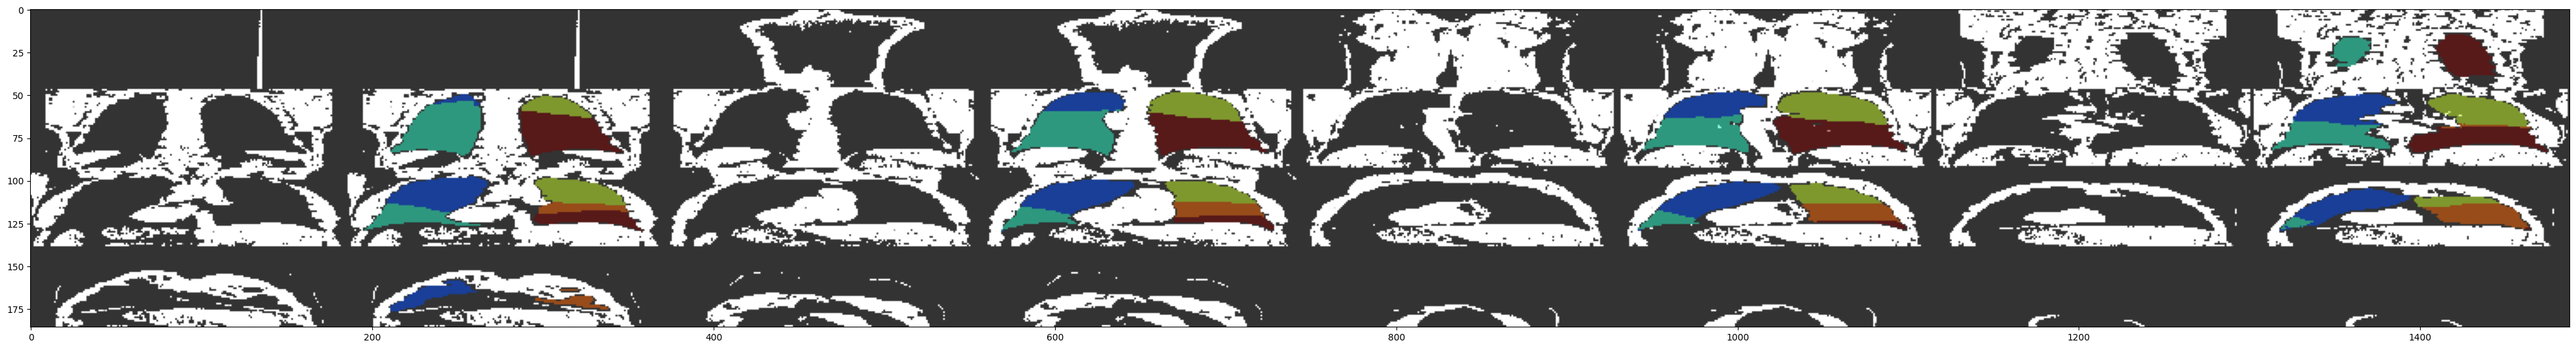

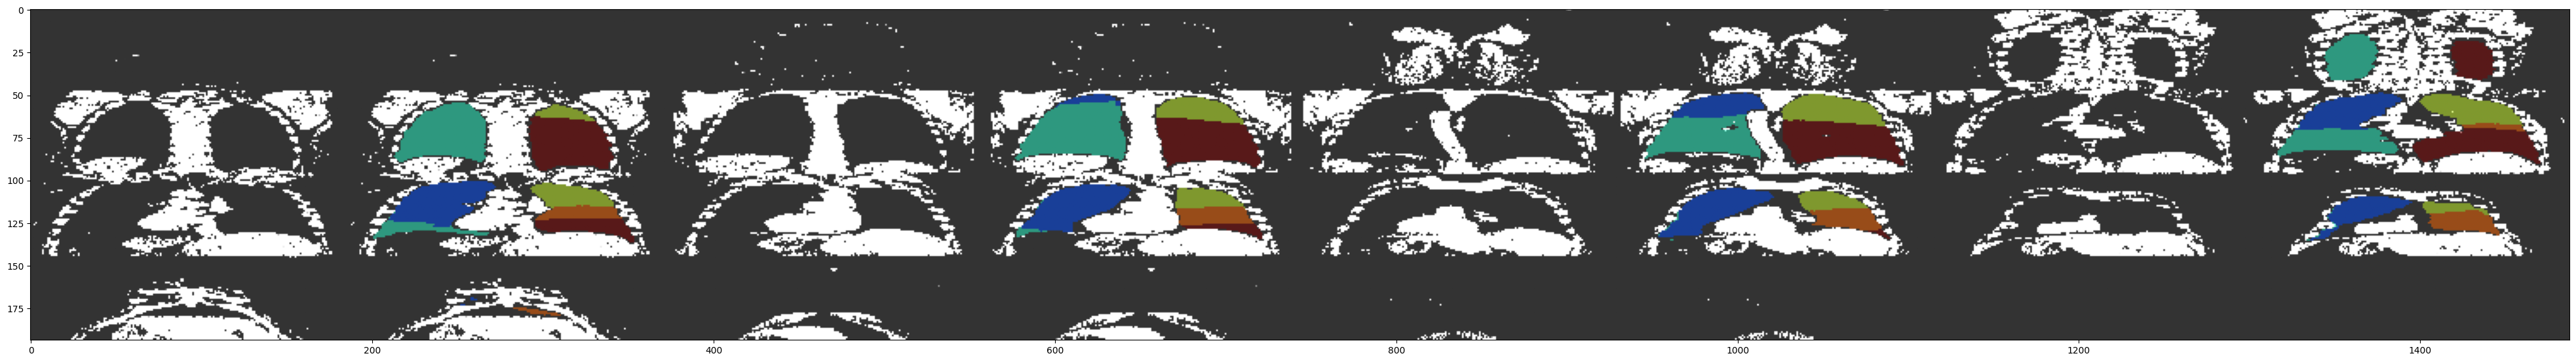

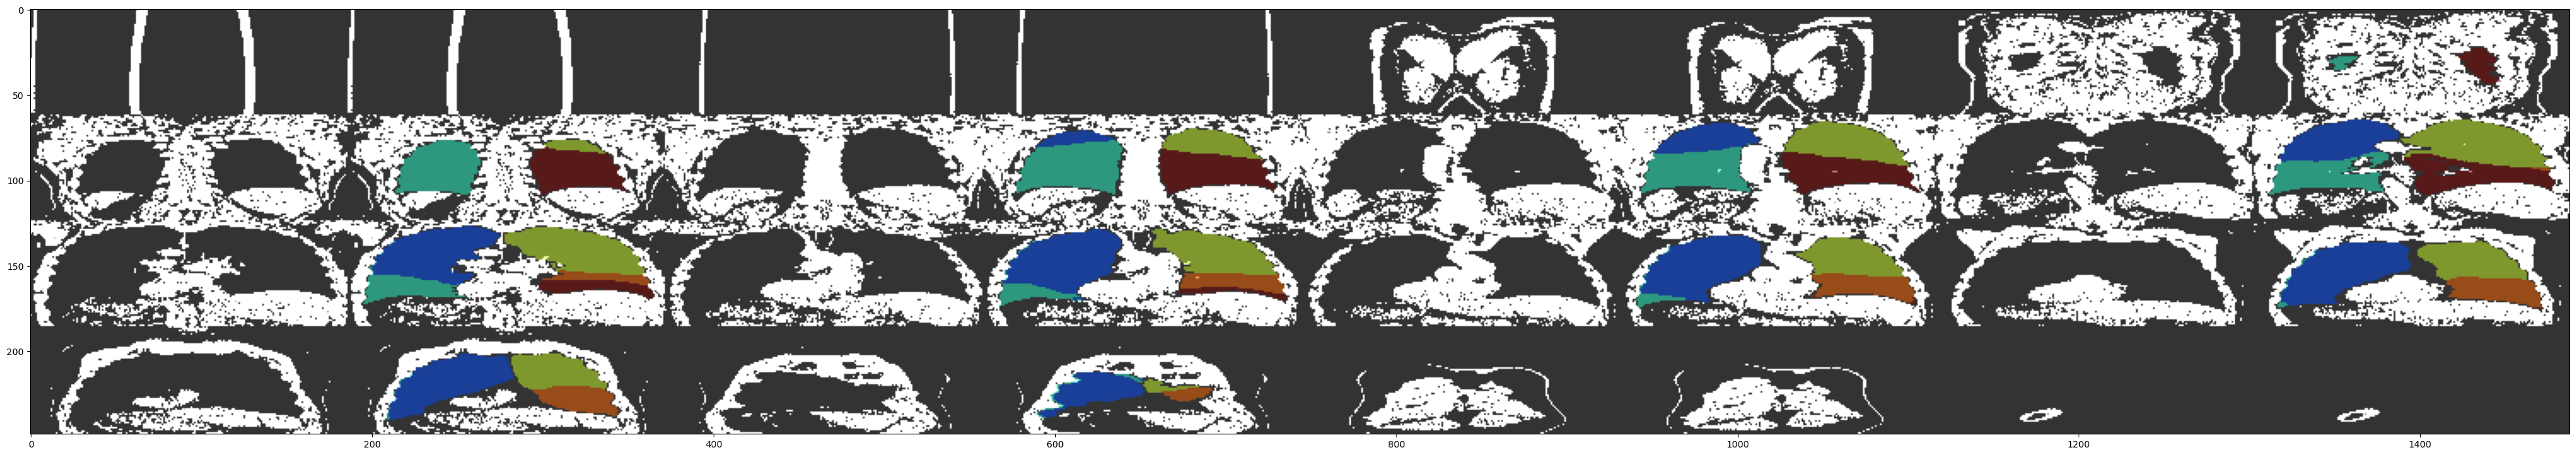

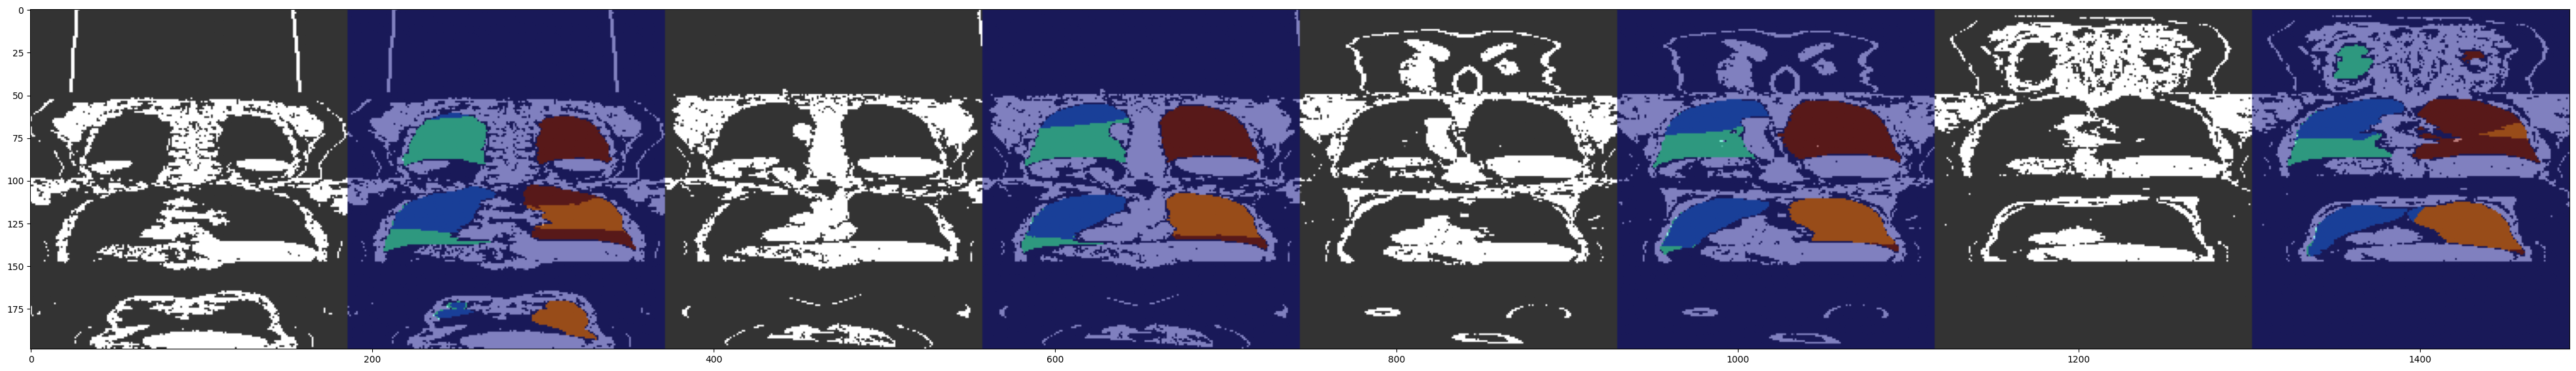

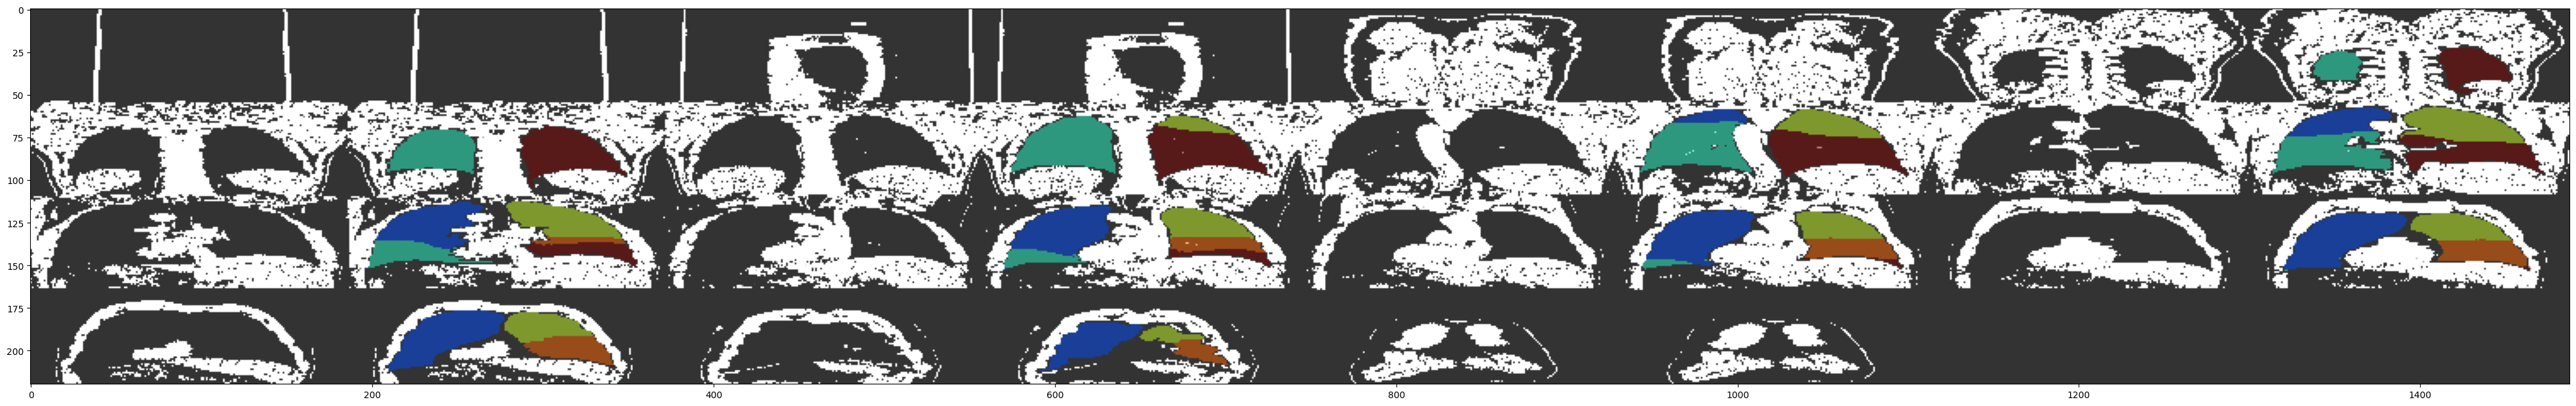

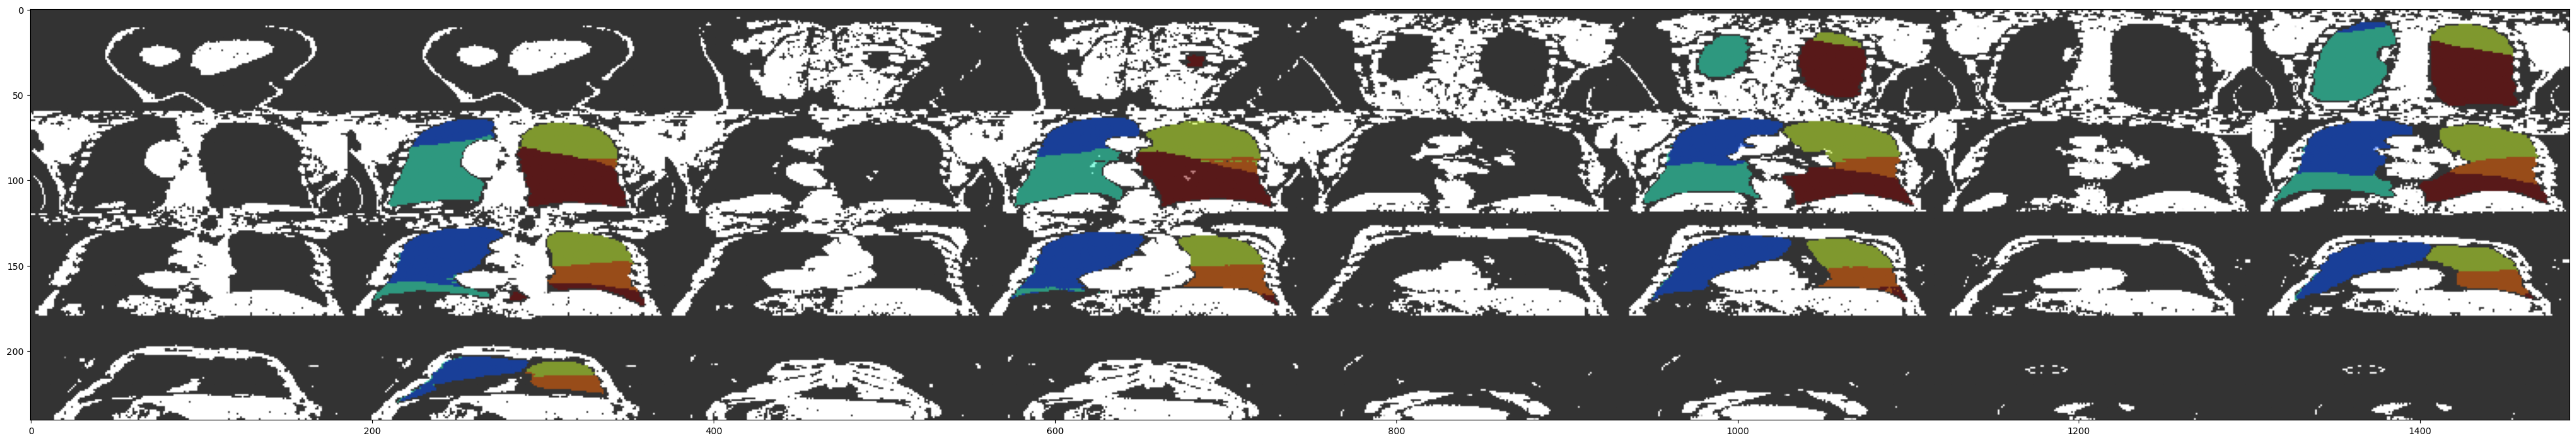

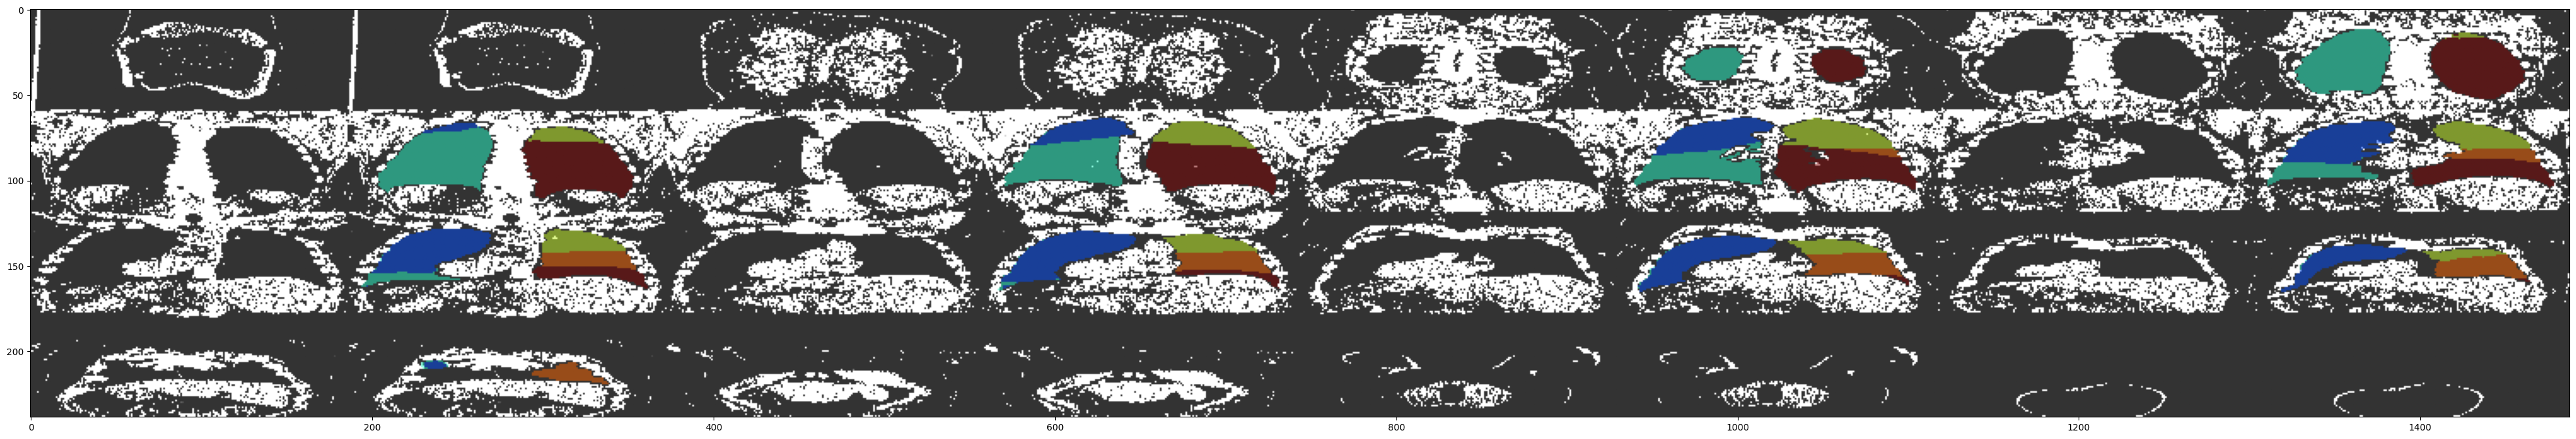

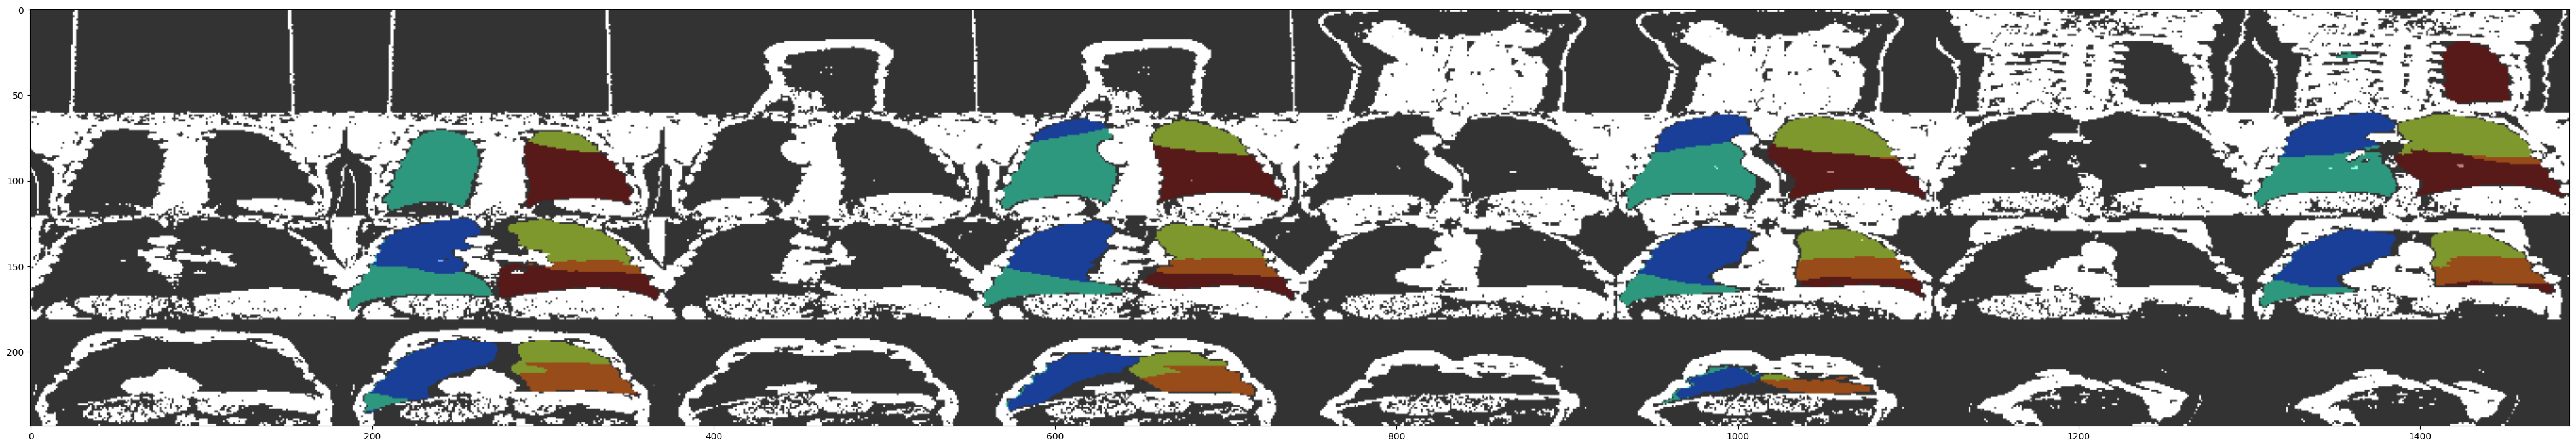

In [24]:
# visualize png clips
import glob
import matplotlib.image as mpimg
clip_dir = "/home/local/VANDERBILT/litz/github/MASILab/lobe_seg/clips/emp_nlst/"
clips = glob.glob(os.path.join(clip_dir, "*.png"))
for clip in clips:
    clip_img = mpimg.imread(clip)
    plt.figure(figsize=(50,50))
    plt.imshow(clip_img)
    plt.show()